<a href="https://colab.research.google.com/github/kishanAd/Ipldataanalysis/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import zipfile


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import regex as re

In [4]:
!unzip -q /content/drive/"My Drive"/data/ipl.zip



In [5]:
# zip=zipfile.ZipFile("/content/drive/My Drive/data/ipl.zip","r")
# zip.extractall("/tmp")
# zip.close()


In [6]:
df=pd.read_csv("/content/deliveries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
df.tail(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179068,11415,2,Chennai Super Kings,Mumbai Indians,19,3,RA Jadeja,SR Watson,JJ Bumrah,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179069,11415,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,SR Watson,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
179070,11415,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,SR Watson,JJ Bumrah,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179071,11415,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,SR Watson,JJ Bumrah,0,0,4,0,0,0,4,4,8,NaN,NaN,NaN
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


# Individual batsman performance


In [9]:
batsmanname=input("Enter batsman name:")

Enter batsman name:SR Watson


In [10]:
batsman=df[df["player_dismissed"]==batsmanname]
batsman

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
234,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,3,SR Watson,S Aravind,A Nehra,0,0,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques
1013,5,1,Royal Challengers Bangalore,Delhi Daredevils,9,4,SR Watson,KM Jadhav,S Nadeem,0,0,0,0,0,0,0,0,0,SR Watson,stumped,RR Pant
1683,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,6,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
4041,17,2,Royal Challengers Bangalore,Rising Pune Supergiant,16,5,SR Watson,STR Binny,BA Stokes,0,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
8592,37,1,Royal Challengers Bangalore,Mumbai Indians,14,4,SR Watson,KM Jadhav,JJ Bumrah,0,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176482,11341,1,Chennai Super Kings,Delhi Capitals,4,2,SR Watson,F du Plessis,J Suchith,0,0,0,0,0,0,0,0,0,SR Watson,caught,AR Patel
177664,11346,1,Chennai Super Kings,Kings XI Punjab,5,2,SR Watson,F du Plessis,S Curran,0,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
178138,11412,1,Chennai Super Kings,Mumbai Indians,6,6,SR Watson,M Vijay,KH Pandya,0,0,0,0,0,0,0,0,0,SR Watson,caught,J Yadav
178789,11414,2,Chennai Super Kings,Delhi Capitals,13,2,SR Watson,SK Raina,A Mishra,0,0,0,0,0,0,0,0,0,SR Watson,caught,TA Boult


In [11]:
batsman["dismissal_kind"].unique()
batsman.dismissal_kind.value_counts()

caught               66
bowled               32
run out               9
lbw                   4
stumped               3
caught and bowled     1
Name: dismissal_kind, dtype: int64

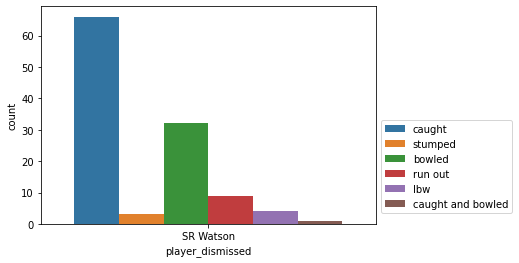

In [12]:
sb.countplot(x="player_dismissed",data=batsman,hue="dismissal_kind")
plt.legend(bbox_to_anchor=(1,0.5))

Text(0.5, 1.0, ' number  dismissal against bowler ')

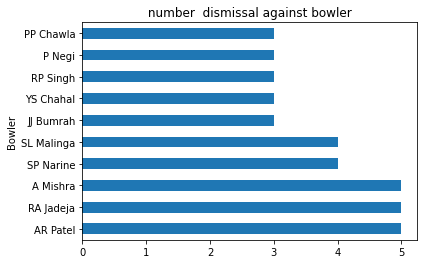

In [13]:

batsman.bowler.value_counts().head(10).plot(kind="barh")
plt.ylabel("Bowler")
plt.title(" number  dismissal against bowler ")

In [14]:
batsman.bowling_team.value_counts()

Mumbai Indians                 20
Kings XI Punjab                15
Kolkata Knight Riders          14
Sunrisers Hyderabad            14
Royal Challengers Bangalore    12
Chennai Super Kings            11
Delhi Daredevils               10
Rajasthan Royals                4
Gujarat Lions                   3
Pune Warriors                   3
Deccan Chargers                 3
Kochi Tuskers Kerala            2
Delhi Capitals                  2
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: bowling_team, dtype: int64

Text(0.5, 1.0, 'dismissal against team')

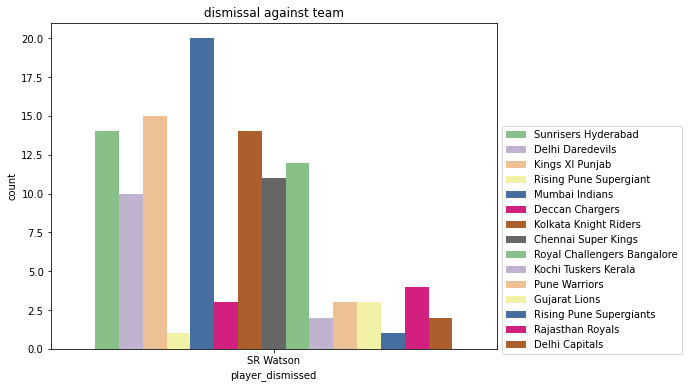

In [54]:
plt.rcParams["figure.figsize"] = (8,6)
sb.countplot(x="player_dismissed",data=batsman,hue="bowling_team",palette="Accent")
plt.legend(bbox_to_anchor=(1,0.7))
plt.title("dismissal against team")

# Top run scorer


In [16]:
df=df[df["total_runs"]!=0]
runs=df.groupby(["batsman"]).sum()
runscorer=runs.sort_values(by="batsman_runs",ascending=False)





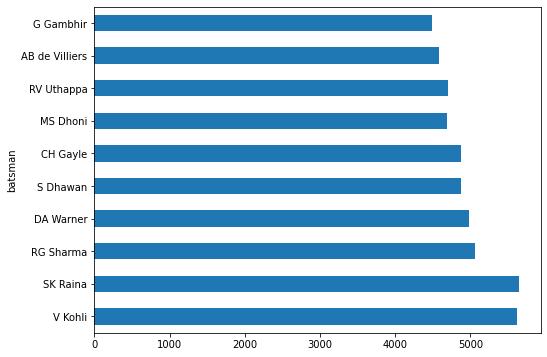

In [17]:
top10=runscorer.head(10)
top10["total_runs"].plot(kind="barh")

# Match result analysis


In [18]:
match=pd.read_csv("/content/matches.csv")


In [19]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [20]:
match.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


# How many matches are played in IPL till 2020?


In [21]:
match.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
#816 matches were played till 2019 season.

# Maximum matches per season

In [44]:
seasonpermatch=match.groupby(["season"]).count()
seasonpermatch


,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0
2009,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,0
2010,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2011,73,73,73,73,73,73,73,73,73,72,73,73,72,73,73,73,0
2012,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0
2013,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0
2014,60,53,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2015,59,59,59,59,59,59,59,59,59,57,59,59,57,59,59,59,0
2016,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0


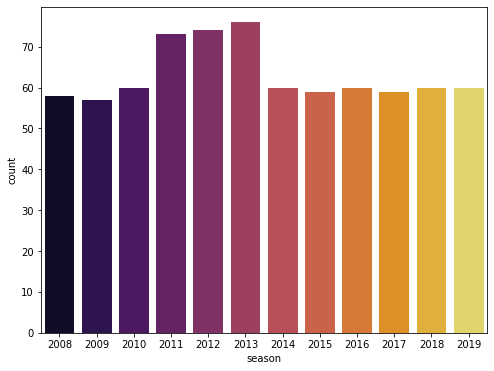

In [45]:
sb.countplot(x="season",data=match,palette="inferno")

In [ ]:
# 2013 season has maximum number of matches

# Player with most Man of the Match title

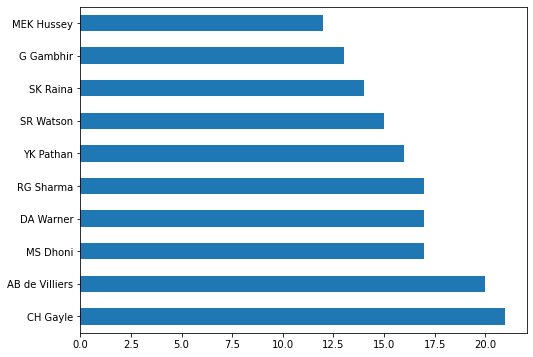

In [23]:
manofmatch=match.player_of_match.value_counts()
manofmatch.head(10).plot(kind="barh")


# Which team has won maximum number of matches?

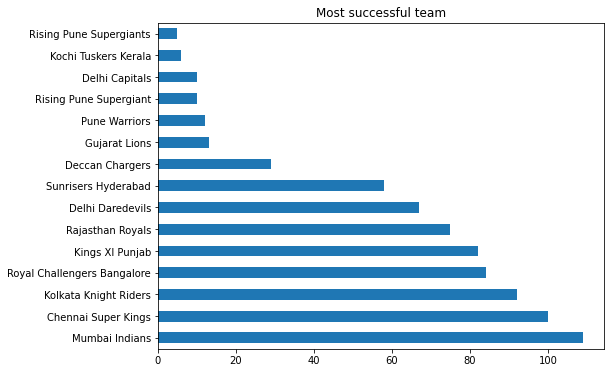

In [24]:
mostwin=match.winner.value_counts()
plt.title("Most successful team")

mostwin.plot(kind="barh")


In [25]:
#Mumbai Indian has won most number of IPL matches till 2020 season.


In [26]:
mostwin

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [27]:
topteam=match.groupby("winner").apply(lambda x:x["winner"].count()).reset_index(name="Winner counts")

In [32]:
topteam=topteam.sort_values(by="Winner counts",ascending=False)

([<matplotlib.patches.Wedge at 0x7f73d4abc5d0>,
 [Text(1.0328162335873285, 0.5057574790732067, 'Mumbai Indians'),
  Text(0.27593056988787823, 1.116405983771742, 'Chennai Super Kings'),
  Text(-0.6106742172669793, 0.9744624160866147, 'Kolkata Knight Riders'),
  Text(-1.106562329777477, 0.31308115612001064, 'Royal Challengers Bangalore'),
  Text(-1.0510976928046152, -0.46657651053264027, 'Kings XI Punjab'),
  Text(-0.5484510198728112, -1.0107925003681386, 'Rajasthan Royals'),
  Text(0.11032895284185781, -1.1446953840060767, 'Delhi Daredevils'),
  Text(0.6665910417065545, -0.937099985656051, 'Sunrisers Hyderabad'),
  Text(0.9561900765799298, -0.638905734400677, 'Deccan Chargers'),
  Text(1.0530377430685307, -0.4621812541342793, 'Gujarat Lions'),
  Text(1.0954827849510846, -0.34988207710000735, 'Pune Warriors'),
  Text(1.1229710078095285, -0.247863098542829, 'Delhi Capitals'),
  Text(1.1397391165115713, -0.1532799605082894, 'Rising Pune Supergiant'),
  Text(1.1474319130513193, -0.076811489

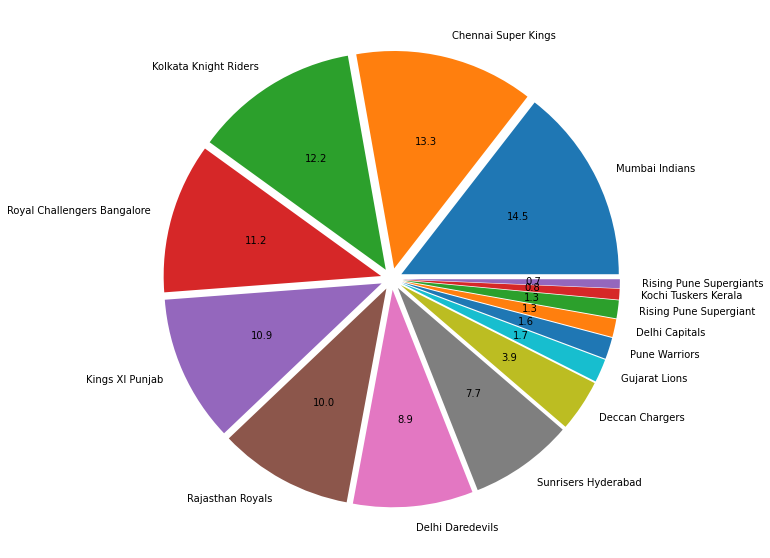

In [43]:
plt.figure(figsize=(10,10))
plt.pie(x=topteam["Winner counts"],labels=topteam["winner"],autopct="%.1f",explode=[0.05]*15)

# Top cities to host Ipl matches


In [29]:
city=match.groupby("city").apply(lambda x:x["city"].count()).reset_index(name="Match Counts")

([<matplotlib.patches.Wedge at 0x7f73d4bced90>,
 [Text(2.0155946720974174, 0.999939057049231, 'Mumbai'),
  Text(0.662031912613814, 2.150398508807355, 'Kolkata'),
  Text(-0.8551103954520197, 2.0811742386426686, 'Delhi'),
  Text(-1.9268335380562747, 1.1618143210606156, 'Bangalore'),
  Text(-2.2471705033085168, -0.11280394080061888, 'Hyderabad'),
  Text(-1.8546227414258476, -1.273920910804935, 'Chennai'),
  Text(-1.068268725036235, -1.980227747282988, 'Jaipur'),
  Text(-0.15888498320630853, -2.2443831139338783, 'Chandigarh'),
  Text(0.6913843800438805, -2.141141667202649, 'Pune'),
  Text(1.1837027417523294, -1.913464872729055, 'Durban'),
  Text(1.4256494893917313, -1.740696278331489, 'Bengaluru'),
  Text(1.628616195139433, -1.552452668821036, 'Visakhapatnam'),
  Text(1.794629241653619, -1.3571314914192205, 'Ahmedabad'),
  Text(1.9321109592601347, -1.1530165831881534, 'Centurion'),
  Text(2.03786579831277, -0.9537310879210432, 'Mohali'),
  Text(2.116251019304258, -0.7641869033774983, 'Rajk

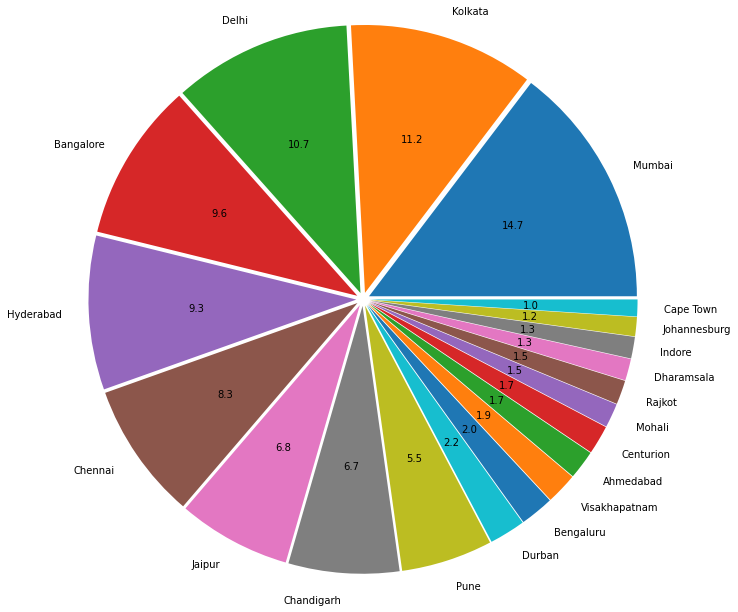

In [41]:
top_city=city.sort_values(by="Match Counts",ascending=False).head(20)
plt.figure(figsize=(6,8))
plt.pie(x=top_city["Match Counts"],labels=top_city["city"],radius=2,autopct="%.1f",explode=[0.05]*20)